In [1]:
import pandas as pd

train_data = pd.read_csv("Churn_Modelling.csv")

In [2]:
train_data = train_data.set_index("RowNumber")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

cat_pipeline = Pipeline([
    ("cat_encoder", OneHotEncoder(sparse_output = False) )
])

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median"))
])

In [5]:
from sklearn.compose import ColumnTransformer

num_attribs = ["CreditScore", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]
cat_attribs = ["Gender"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['CreditScore', 'Tenure', 'Balance',
                                  'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('cat_encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Gender'])])

In [6]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])

In [7]:
y_train = train_data["Exited"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.2)

In [9]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = forest_clf.predict(x_test)

In [11]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, x_test, y_test, cv=10)
forest_scores.mean()

0.7955

In [12]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)
svm_scores = cross_val_score(svm_clf, x_test, y_test, cv=10)
svm_scores.mean()

0.7929999999999999

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier(max_depth= 4)
dtc_clf.fit(X_train, y_train)
dtc_scores =  (dtc_clf, x_test, y_test)

In [14]:
dtc_clf.fit(x_test, y_test)

DecisionTreeClassifier(max_depth=4)

In [15]:
from sklearn.tree import export_graphviz 
export_graphviz(
    dtc_clf,
    out_file= "C:CodSoft InternshipBank Customer Churn Predictiondtree.dot"
)

In [16]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='lbfgs', max_iter=100000)
lr_clf_scores = cross_val_score(lr_clf, x_test, y_test)
lr_clf_scores.mean()

0.7925

In [17]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    dtc_clf, n_estimators = 500,
    max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True
)

In [18]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True)

In [19]:
y_pred = bag_clf.predict(x_test)

In [20]:
bag_clf.oob_score_

0.821875

In [21]:
bag_clf_scores = cross_val_score(bag_clf, x_test, y_test)
bag_clf_scores.mean()

0.8109999999999999

In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1586
           1       0.88      0.10      0.18       414

    accuracy                           0.81      2000
   macro avg       0.84      0.55      0.54      2000
weighted avg       0.82      0.81      0.75      2000



In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    dtc_clf, n_estimators = 500,
    algorithm="SAMME.R", learning_rate=0.5
)

ada_clf.fit(X_train, y_train)

c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.5, n_estimators=500)

In [24]:
ada_clf.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1580,    6],
       [ 372,   42]], dtype=int64)

In [26]:
import tensorflow as tk
from tensorflow import keras

In [27]:
X_train.shape

(8000, 9)

In [28]:
x_test.shape

(2000, 9)

In [40]:
print(X_train.shape[1:])

(9,)


In [69]:
model = keras.Sequential([
    keras.layers.Input(X_train.shape[1:]),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(2, activation="sigmoid")
])

In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 432 (1.69 KB)

 Trainable params: 432 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
optimizers = keras.optimizers.Nadam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name="nadam",
)

In [72]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer=optimizers, metrics=["accuracy"])

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_val, Y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [77]:
history = model.fit(x_train, Y_train, epochs=1000, validation_data=(x_val, y_val))

Epoch 1/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7019 - loss: 26.9109 - val_accuracy: 0.7912 - val_loss: 46.6906
Epoch 2/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - loss: 27.6175 - val_accuracy: 0.7894 - val_loss: 11.9750
Epoch 3/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7046 - loss: 26.9183 - val_accuracy: 0.7812 - val_loss: 10.5886
Epoch 4/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7065 - loss: 26.6702 - val_accuracy: 0.2575 - val_loss: 27.3828
Epoch 5/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6736 - loss: 31.1040 - val_accuracy: 0.7462 - val_loss: 18.7617
Epoch 6/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6787 - loss: 31.3860 - val_accuracy: 0.7069 - val_loss: 14.1287
Epoch 7/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6945 - loss: 29.8275 - val_accuracy: 0.7056 - val_loss: 20.9569
Epoch 8/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6872 - l

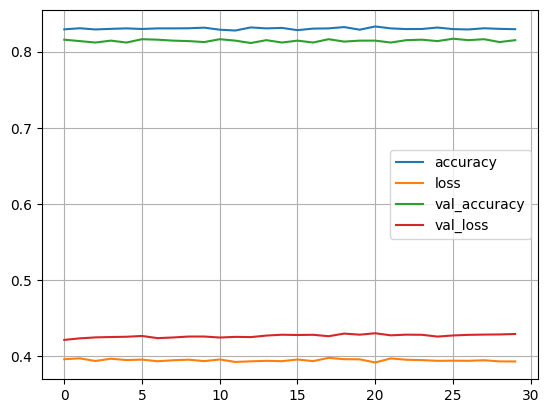

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [68]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8033 - loss: 0.4490


[0.438191682100296, 0.8065000176429749]